на основе [статьи](https://actamachina.com/posts/handwritten-mathematical-expression-recognition)

In [ ]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import collections
import re

from typing import Dict, List, Tuple, Union


class LaTeXTokenizer:
    def __init__(self):
        self.special_tokens = ["[PAD]", "[BOS]", "[EOS]", "[UNK]"]
        self.vocab = {}
        self.token_to_id = {}
        self.id_to_token = {}

    def tokenize(self, text: str) -> List[str]:
        # Tokenize LaTeX using regex to capture commands, numbers and other characters
        return re.findall(r"\\[a-zA-Z]+|\\.|[a-zA-Z0-9]|\S", text)

    def build_vocab(self, texts: List[str]):
        # Add special tokens to vocabulary
        for token in self.special_tokens:
            self.vocab[token] = len(self.vocab)

        # Create a counter to hold token frequencies
        counter = collections.Counter()

        # Tokenize each text and update the counter
        for text in texts:
            tokens = self.tokenize(text)
            counter.update(tokens)

        # Add tokens to vocab based on their frequency
        for token, _ in counter.most_common():
            if token not in self.vocab:
                self.vocab[token] = len(self.vocab)

        # Build dictionaries for token to ID and ID to token conversion
        self.token_to_id = self.vocab
        self.id_to_token = {v: k for k, v in self.vocab.items()}

    def encode(self, text: str) -> List[int]:
        # Tokenize the input text and add start and end tokens
        tokens = ["[BOS]"] + self.tokenize(text) + ["[EOS]"]

        # Map tokens to their IDs, using [UNK] for unknown tokens
        unk_id = self.token_to_id["[UNK]"]
        return [self.token_to_id.get(token, unk_id) for token in tokens]

    def decode(self, token_ids: List[int]) -> List[str]:
        # Map token IDs back to tokens
        tokens = [self.id_to_token.get(id, "[UNK]") for id in token_ids]

        # Remove tokens beyond the [EOS] token
        if "[EOS]" in tokens:
            tokens = tokens[: tokens.index("[EOS]")]

        # Replace [UNK] with ?
        tokens = ["?" if token == "[UNK]" else token for token in tokens]

        # Reconstruct the original text, ignoring special tokens
        return "".join([token for token in tokens if token not in self.special_tokens])

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount("/content/gdrive")
data_path = Path("/content/gdrive/MyDrive/ragaik")

Mounted at /content/gdrive


In [ ]:
!unzip {data_path / "CROHME23_inkml.zip"} -d /content/data/

Archive:  /content/gdrive/MyDrive/ragaik/CROHME23_inkml.zip
   creating: /content/data/CROHME23_inkml/
   creating: /content/data/CROHME23_inkml/test/
  inflating: /content/data/CROHME23_inkml/test/form_025_E193.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_027_E211.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_031_E245.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_045_E356.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_046_E361.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_047_E370.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_047_E376.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_048_E378.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_050_E394.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_051_E403.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_051_E408.inkml  
  inflating: /content/data/CROHME23_inkml/test/form_052_E415.inkml  
  inflating: /content

In [ ]:
data_path = Path("/content/data/CROHME23_inkml")

In [ ]:
from tqdm import tqdm

3900it [02:24, 26.97it/s]


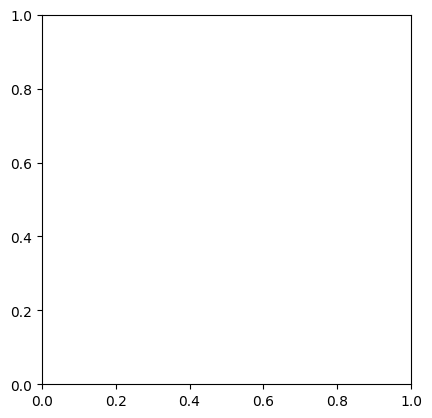

In [ ]:
import io
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

from pathlib import Path
from PIL import Image


def parse_inkml(inkml_file_path, ns={"inkml": "http://www.w3.org/2003/InkML"}):
    tree = ET.parse(inkml_file_path)
    root = tree.getroot()

    strokes = []
    for trace in root.findall(".//inkml:trace", ns):
        coords = trace.text.strip().split(",")
        coords = [
            (float(x), -float(y))  # Invert y-axis to match InkML's coordinate system
            for x, y, *z in [coord.split() for coord in coords]
        ]
        strokes.append(coords)

    latex = root.find('.//inkml:annotation[@type="truth"]', ns).text.strip(" $")

    return strokes, latex


def cache_data():
    fig, ax = plt.subplots()

    for inkml_file in tqdm(Path("/content/data/CROHME23_inkml/").glob("*/*.inkml")):
        img_file = inkml_file.with_suffix(".png")
        txt_file = inkml_file.with_suffix(".txt")

        strokes, latex = parse_inkml(inkml_file)

        # Write LaTeX to file
        with open(txt_file, "w") as f:
            f.write(latex)

        # Render strokes to file
        ax.set_axis_off()
        ax.set_aspect("equal")
        for coords in strokes:
            x, y = zip(*coords)
            ax.plot(x, y, color="black", linewidth=2)
        buf = io.BytesIO()
        plt.savefig(buf, bbox_inches="tight", pad_inches=0)
        plt.cla()
        buf.seek(0)
        img = Image.open(buf).convert("RGB")
        img.save(img_file)

cache_data()

In [ ]:
import lightning.pytorch as pl
import torch
import torch.nn.functional as F

from pathlib import Path
from PIL import Image
from torch import nn, optim, Tensor
from torch.nn.utils.rnn import pad_sequence
from torch.utils import data
from torchvision import transforms


class CROHMEDataset(data.Dataset):
    def __init__(self, latex_files, tokenizer, transform):
        super().__init__()
        self.latex_files = list(latex_files)
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.latex_files)

    def __getitem__(self, idx):
        latex_file = self.latex_files[idx]
        image_file = latex_file.with_suffix(".png")

        with open(latex_file) as f:
            latex = f.read()

        x = self.transform(Image.open(image_file))
        y = Tensor(self.tokenizer.encode(latex))
        return x, y


class CROHMEDataModule(pl.LightningDataModule):
    def __init__(
        self,
        data_dir: str,
        batch_size: int = 1,
        num_workers: int = 0,
        pin_memory: bool = False,
    ):
        super().__init__()
        self.save_hyperparameters()
        self.data_dir = Path(data_dir)
        self.transform = transforms.Compose(
            [
                transforms.RandomPerspective(distortion_scale=0.1, p=0.5, fill=255),
                transforms.ToTensor(),
            ]
        )

    def setup(self, stage):
        latexes = []
        for latex_file in self.data_dir.glob("train/*.txt"):
            with open(latex_file) as f:
                latexes.append(f.read())

        self.tokenizer = LaTeXTokenizer()
        self.tokenizer.build_vocab(latexes)
        self.vocab_size = len(self.tokenizer.vocab)

        if stage == "fit" or stage is None:
            self.train_dataset = CROHMEDataset(
                self.data_dir.glob("train/*.txt"), self.tokenizer, self.transform
            )
            self.val_dataset = CROHMEDataset(
                self.data_dir.glob("val/*.txt"), self.tokenizer, self.transform
            )

    def collate_fn(self, batch, max_width: int = 512, max_height: int = 384):
        images, labels = zip(*batch)

        # Create a white background for each image in the batch
        src = torch.ones((len(images), 3, max_height, max_width))

        # Center and pad individual images to fit into the white background
        for i, img in enumerate(images):
            height_start = (max_height - img.size(1)) // 2
            height_end = height_start + img.size(1)
            width_start = (max_width - img.size(2)) // 2
            width_end = width_start + img.size(2)
            src[i, :, height_start:height_end, width_start:width_end] = img

        # Pad sequences for labels and create attention mask
        tgt = pad_sequence(labels, batch_first=True).long()
        seq_len = tgt.size(1)
        tgt_mask = torch.triu(torch.ones(seq_len, seq_len) * float("-inf"), diagonal=1)

        return src, tgt, tgt_mask

    def train_dataloader(self):
        return data.DataLoader(
            self.train_dataset,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            collate_fn=self.collate_fn,
            pin_memory=self.hparams.pin_memory,
        )

    def val_dataloader(self):
        return data.DataLoader(
            self.val_dataset,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            collate_fn=self.collate_fn,
            pin_memory=self.hparams.pin_memory,
        )

In [ ]:
datamodule = CROHMEDataModule(str(data_path), batch_size=16)
datamodule.setup(stage="fit")

tokenizer = datamodule.tokenizer

train_dataloader = datamodule.train_dataloader()
batch = next(iter(train_dataloader))
src, tgt, tgt_mask = batch

(np.float64(-0.5), np.float64(2057.5), np.float64(1545.5), np.float64(-0.5))

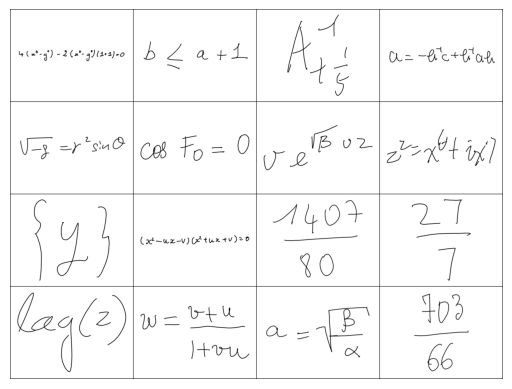

In [ ]:
from torchvision.utils import make_grid

plt.imshow(make_grid(src, nrow=4).permute(1, 2, 0))
plt.axis("off")

In [ ]:
import math
import matplotlib.pyplot as plt


class PositionalEncoding1D(nn.Module):
    def __init__(
        self,
        d_model: int,
        dropout: float = 0.1,
        max_len: int = 1000,
        temperature: float = 10000.0,
    ):
        super().__init__()

        # Generate position and dimension tensors for encoding
        position = torch.arange(max_len).unsqueeze(1)
        dim_t = torch.arange(0, d_model, 2)
        div_term = torch.exp(dim_t * (-math.log(temperature) / d_model))

        # Initialize and fill the positional encoding matrix with sine/cosine values
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer("pe", pe)

    def forward(self, x):
        batch, sequence_length, d_model = x.shape
        return self.dropout(x + self.pe[None, :sequence_length, :])


class PositionalEncoding2D(nn.Module):
    def __init__(
        self,
        d_model: int,
        dropout: float = 0.1,
        max_len: int = 30,
        temperature: float = 10000.0,
    ):
        super().__init__()

        # Generate position and dimension tensors for 1D encoding
        position = torch.arange(max_len).unsqueeze(1)
        dim_t = torch.arange(0, d_model, 2)
        div_term = torch.exp(dim_t * (-math.log(temperature) / d_model))

        # Initialize and fill the 1D positional encoding matrix with sine/cosine values
        pe_1D = torch.zeros(max_len, d_model)
        pe_1D[:, 0::2] = torch.sin(position * div_term)
        pe_1D[:, 1::2] = torch.cos(position * div_term)

        # Compute the 2D positional encoding matrix using outer product
        pe_2D = torch.zeros(max_len, max_len, d_model)
        for i in range(d_model):
            pe_2D[:, :, i] = pe_1D[:, i].unsqueeze(-1) + pe_1D[:, i].unsqueeze(0)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer("pe", pe_2D)

    def forward(self, x):
        batch, height, width, d_model = x.shape
        return self.dropout(x + self.pe[None, :height, :width, :])

In [ ]:
from torchvision.models import densenet121, DenseNet121_Weights


class Permute(nn.Module):
    def __init__(self, *dims: int):
        super().__init__()
        self.dims = dims

    def forward(self, x):
        return x.permute(*self.dims)


class Model(pl.LightningModule):
    def __init__(
        self,
        vocab_size: int,
        d_model: int,
        nhead: int,
        dim_feedforward: int,
        dropout: float,
        num_layers: int,
        lr: float = 1e-4,
    ):
        super().__init__()
        self.save_hyperparameters()
        self.example_input_array = (
            torch.rand(16, 3, 384, 512),  # batch x channel x height x width
            torch.ones(16, 64, dtype=torch.long),  # batch x sequence length
            torch.zeros(64, 64),  # sequence length x sequence length
        )

        # Define the encoder architecture
        densenet = densenet121(weights=DenseNet121_Weights.DEFAULT)
        self.encoder = nn.Sequential(
            nn.Sequential(*list(densenet.children())[:-1]),  # remove the final layer
            nn.Conv2d(1024, d_model, kernel_size=1),
            Permute(0, 2, 3, 1),
            PositionalEncoding2D(d_model, dropout),
            nn.Flatten(1, 2),
        )

        # Define the decoder architecture
        self.tgt_embedding = nn.Embedding(vocab_size, d_model, padding_idx=0)
        self.word_positional_encoding = PositionalEncoding1D(d_model, dropout)
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(
                d_model, nhead, dim_feedforward, dropout, batch_first=True
            ),
            num_layers,
        )
        self.fc_out = nn.Linear(d_model, vocab_size)

    def decoder(self, features, tgt, tgt_mask):
        padding_mask = tgt.eq(0)
        tgt = self.tgt_embedding(tgt) * math.sqrt(self.hparams.d_model)
        tgt = self.word_positional_encoding(tgt)
        tgt = self.transformer_decoder(
            tgt, features, tgt_mask=tgt_mask, tgt_key_padding_mask=padding_mask
        )
        output = self.fc_out(tgt)
        return output

    def forward(self, src, tgt, tgt_mask):
        features = self.encoder(src)
        output = self.decoder(features, tgt, tgt_mask)
        return output

    def training_step(self, batch, batch_idx):
        loss = self._shared_eval_step(batch, batch_idx)
        self.log(
            "train_loss",
            loss,
            on_step=True,
            on_epoch=True,
            sync_dist=True,
            prog_bar=True,
        )
        return loss

    def validation_step(self, batch, batch_idx):
        loss = self._shared_eval_step(batch, batch_idx)
        metrics = {"val_loss": loss}
        self.log_dict(metrics, sync_dist=True)
        return metrics

    def _shared_eval_step(self, batch, batch_idx):
        src, tgt, tgt_mask = batch
        tgt_in = tgt[:, :-1]
        tgt_out = tgt[:, 1:]
        output = self(src, tgt_in, tgt_mask[:-1, :-1])
        loss = F.cross_entropy(
            output.reshape(-1, self.hparams.vocab_size),
            tgt_out.reshape(-1),
            ignore_index=0,
        )
        return loss

    def beam_search(
        self,
        src,
        tokenizer,
        max_seq_len: int = 256,
        beam_width: int = 3,
    ) -> List[str]:
        with torch.no_grad():
            batch_size = src.size(0)
            vocab_size = self.hparams.vocab_size
            features = self.encoder(src).detach()
            features_rep = features.repeat_interleave(beam_width, dim=0)
            tgt_mask = torch.triu(
                torch.ones(max_seq_len, max_seq_len) * float("-inf"), diagonal=1
            ).to(src.device)

            # Initialize with [BOS]
            beams = torch.ones(batch_size, 1, 1).long().to(src.device)

            # Handle first step separately
            output = self.decoder(features, beams[:, 0, :], tgt_mask[:1, :1])
            next_probs = output[:, -1, :].log_softmax(dim=-1)
            beam_scores, indices = next_probs.topk(beam_width, dim=-1)
            beams = torch.cat(
                [beams.repeat_interleave(beam_width, dim=1), indices.unsqueeze(2)],
                dim=-1,
            )

            for i in range(2, max_seq_len):
                tgt = beams.view(batch_size * beam_width, i)
                output = self.decoder(features_rep, tgt, tgt_mask[:i, :i])
                next_probs = output[:, -1, :].log_softmax(dim=-1)

                next_probs += beam_scores.view(batch_size * beam_width, 1)
                next_probs = next_probs.view(batch_size, -1)

                beam_scores, indices = next_probs.topk(beam_width, dim=-1)
                beams = torch.cat(
                    [
                        beams[
                            torch.arange(batch_size).unsqueeze(-1),
                            indices // vocab_size,
                        ],
                        (indices % vocab_size).unsqueeze(2),
                    ],
                    dim=-1,
                )

        best_beams = beams[:, 0, :]  # taking the best beam for each batch
        return [tokenizer.decode(seq.tolist()) for seq in best_beams]

    def greedy_search(self, src, tokenizer, max_seq_len: int = 256) -> List[str]:
        with torch.no_grad():
            batch_size = src.size(0)
            features = self.encoder(src).detach()
            tgt = torch.ones(batch_size, 1).long().to(src.device)
            tgt_mask = torch.triu(
                torch.ones(max_seq_len, max_seq_len) * float("-inf"), diagonal=1
            ).to(src.device)

            for i in range(1, max_seq_len):
                output = self.decoder(features, tgt, tgt_mask[:i, :i])
                next_probs = output[:, -1].log_softmax(dim=-1)
                next_chars = next_probs.argmax(dim=-1, keepdim=True)
                tgt = torch.cat((tgt, next_chars), dim=1)

        return [tokenizer.decode(seq.tolist()) for seq in tgt]

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, patience=3, verbose=True
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {"scheduler": scheduler, "monitor": "val_loss"},
        }

In [ ]:
import wandb

from lightning.pytorch.callbacks import Callback


class LogPredictionSamples(Callback):
    def on_validation_batch_end(
        self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx=0
    ):
        if batch_idx == 0:  # log samples only for the first batch of validation data
            src, tgt, tgt_mask = batch
            tokenizer = trainer.datamodule.tokenizer

            epoch = pl_module.current_epoch
            images = [wandb.Image(img) for img in src]
            targets = [tokenizer.decode(seq.tolist()) for seq in tgt]
            beams = pl_module.beam_search(src, tokenizer)
            greedys = pl_module.greedy_search(src, tokenizer)

            wandb_logger.log_text(
                key="sample_latex",
                columns=["epoch", "image", "target", "beam", "greedy"],
                data=[
                    [epoch, i, t, b, g]
                    for i, t, b, g in zip(images, targets, beams, greedys)
                ],
            )

In [ ]:
from lightning.pytorch.callbacks.model_summary import ModelSummary
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

wandb_logger = pl.loggers.WandbLogger()

datamodule = CROHMEDataModule(
    str(data_path), batch_size=16, num_workers=8, pin_memory=True
)
datamodule.setup(stage="fit")
model = Model(datamodule.vocab_size, 256, 8, 1024, 0.2, 3)

early_stopping = EarlyStopping(monitor="val_loss", patience=6, verbose=True)
model_summary = ModelSummary(max_depth=2)
log_prediction_samples = LogPredictionSamples()

trainer = pl.Trainer(
    max_epochs=-1,
    logger=wandb_logger,
    callbacks=[early_stopping, model_summary, log_prediction_samples],
    accelerator="gpu",
    devices=1,
    default_root_dir="/content/gdrive/MyDrive/ragaik/ltx_ocr/"
)
trainer.fit(model=model, datamodule=datamodule,
            # ckpt_path="path/to/your/checkpoint.ckpt"
)

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: Fal

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: michlea (michlea-hse-spb) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
INFO: 
   | Name                             | Type                 | Params | Mode  | In sizes                                            | Out sizes         
--------------------------------------------------------------------------------------------------------------------------------------------------------------
0  | encoder                          | Sequential           | 7.2 M  | train | [16, 3, 384, 512]                                   | [16, 192, 256]    
1  | encoder.0                        | Sequential           | 7.0 M  | train | [16, 3, 384, 512]                                   | [16, 1024, 12, 16]
2  | encoder.1                        | Conv

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
INFO: Metric val_loss improved. New best score: 3.133
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved. New best score: 3.133


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.276 >= min_delta = 0.0. New best score: 2.858
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.276 >= min_delta = 0.0. New best score: 2.858


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.131 >= min_delta = 0.0. New best score: 2.726
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.131 >= min_delta = 0.0. New best score: 2.726


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.136 >= min_delta = 0.0. New best score: 2.591
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.136 >= min_delta = 0.0. New best score: 2.591


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.104 >= min_delta = 0.0. New best score: 2.487
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.104 >= min_delta = 0.0. New best score: 2.487


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.111 >= min_delta = 0.0. New best score: 2.376
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.111 >= min_delta = 0.0. New best score: 2.376


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.098 >= min_delta = 0.0. New best score: 2.278
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.098 >= min_delta = 0.0. New best score: 2.278


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.085 >= min_delta = 0.0. New best score: 2.193
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.085 >= min_delta = 0.0. New best score: 2.193


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.089 >= min_delta = 0.0. New best score: 2.104
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.089 >= min_delta = 0.0. New best score: 2.104


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 2.100
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 2.100


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 2.035
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 2.035


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.115 >= min_delta = 0.0. New best score: 1.920
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.115 >= min_delta = 0.0. New best score: 1.920


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 1.904
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 1.904


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.080 >= min_delta = 0.0. New best score: 1.824
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.080 >= min_delta = 0.0. New best score: 1.824


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.140 >= min_delta = 0.0. New best score: 1.683
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.140 >= min_delta = 0.0. New best score: 1.683


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 1.675
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 1.675


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.673
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.673


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.069 >= min_delta = 0.0. New best score: 1.603
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.069 >= min_delta = 0.0. New best score: 1.603


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 1.577
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 1.577


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.566
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.566


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 1.548
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 1.548


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 1.497
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 1.497


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 1.464
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 1.464


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 1.422
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 1.422


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 1.371
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 1.371


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.088 >= min_delta = 0.0. New best score: 1.283
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.088 >= min_delta = 0.0. New best score: 1.283


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 1.270
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 1.270


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 1.262
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 1.262


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.251
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.251


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.240
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.240


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Monitored metric val_loss did not improve in the last 6 records. Best score: 1.240. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 6 records. Best score: 1.240. Signaling Trainer to stop.


In [ ]:
!du -sh /content/lightning_logs

123M	/content/lightning_logs


In [ ]:
import shutil
import os

source_path = "/content/lightning_logs"
destination_path = "/content/gdrive/MyDrive/ragaik/ltx_ocr/"

os.makedirs(destination_path, exist_ok=True)

shutil.copytree(source_path, os.path.join(destination_path, "lightning_logs"), dirs_exist_ok=True)

'/content/gdrive/MyDrive/ragaik/ltx_ocr/lightning_logs'

In [ ]:
model.eval()

beam_preds = model.beam_search(src.to(model.device), tokenizer, max_seq_len=256)
greedy_preds = model.greedy_search(src.to(model.device), tokenizer, max_seq_len=256)
tgt_preds = [tokenizer.decode(t.tolist()) for t in tgt]

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [ ]:
import pandas as pd


df = pd.DataFrame(
    {
        "ground_truth": tgt_preds,
        "beam_search": beam_preds,
        "greedy_decoding": greedy_preds,
    }
)

In [ ]:
df

,ground_truth,beam_search,greedy_decoding
0,4(x^0-y^0)-2(x^0-y^0)(1+1)=0,4(x^0-y^0)-y^0,4(x^0-y^0)(x^0-y^0)-y^0
1,b\leqa+1,b\leqa+1,b\leqa+1
2,A^{-1}_{+\frac{1}{5}},A^{-1}_{+\frac{1}{5}}},A^{-1}_{+\frac{1}{5}}
3,a=-b^{-1}c+b^{-1}ab,a=-b^{-1}c+b^{-1}ab^{-1}ab,a=-b^{-1}c+b^{-1}ab
4,\sqrt{-g}=r^2\sin\theta,\sqrt{-g}=r^2\sin\theta,\sqrt{-g}=r^2\sin\theta
5,\cos{F_o}=0,\cos{F_o}=0,\cos{F_o}=0
6,ve^{\sqrt\betavz},ve^{\sqrt\betavz},ve^{\sqrt\betavz}
7,z^2=x^6+ix^7,z^2=x^6+ix^7,z^2=x^6+ix^7
8,\{y\},\{y\},\{y\}
9,(x^2-ux-v)(x^2+ux+v)=0,(x-v)(x^2+ux+ux^2+ux+ux+ux+ux+ux+ux^2)=0,(x^2-ux-ux^2+ux+ux+ux+ux+ux^2)=0
